In [1]:
import pandas as pd
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [2]:
# creating numerical_df
df = df.select_dtypes(include=['number'])

### DATA WRANGLING

In [3]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9082 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        9082 non-null   int64
 1   income                         9082 non-null   int64
 2   monthly_premium_auto           9082 non-null   int64
 3   months_since_last_claim        9082 non-null   int64
 4   months_since_policy_inception  9082 non-null   int64
 5   number_of_open_complaints      9082 non-null   int64
 6   number_of_policies             9082 non-null   int64
 7   total_claim_amount             9082 non-null   int64
dtypes: int64(8)
memory usage: 638.6 KB


### SPLIT

In [4]:
 # Defining x explanatory variables and 1x y traget variable

In [5]:
X = df[["customer_lifetime_value","income","monthly_premium_auto","months_since_last_claim","months_since_policy_inception",
        "number_of_open_complaints","number_of_policies"]]
y = df[["total_claim_amount"]]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
print(df)
df.info

       customer_lifetime_value  income  monthly_premium_auto  \
0                         4809   48029                    61   
1                         2228   92260                    64   
2                        14947   22139                   100   
3                        22332   49078                    97   
4                         9025   23675                   117   
...                        ...     ...                   ...   
10684                    15563   61541                   253   
10685                     5259   61146                    65   
10686                    23893   39837                   201   
10687                    11971   64195                   158   
10688                     6857   68942                   101   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2                           34      

<bound method DataFrame.info of        customer_lifetime_value  income  monthly_premium_auto  \
0                         4809   48029                    61   
1                         2228   92260                    64   
2                        14947   22139                   100   
3                        22332   49078                    97   
4                         9025   23675                   117   
...                        ...     ...                   ...   
10684                    15563   61541                   253   
10685                     5259   61146                    65   
10686                    23893   39837                   201   
10687                    11971   64195                   158   
10688                     6857   68942                   101   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2   

### SCALING WITH PT (PowerTransformer)

In [8]:
import seaborn as sns

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import numpy as np

In [10]:
# Iniciated the PowerTransformer my my case # "pt is the scaler 
pt = PowerTransformer()

# Fit the transformer to my X_train data 
pt = pt.fit(X_train)

# Transform X_train using the fitted transformer
X_train_trans = pt.transform(X_train)

# Transform X_test using the fitted transformer
X_test_trans = pt.transform(X_test) 

# keeps them separately. It also ensures consistency in the transformation process, but only for X! 

# --------------------WHY DONT WE SCALE Y???? --------------------------------

array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

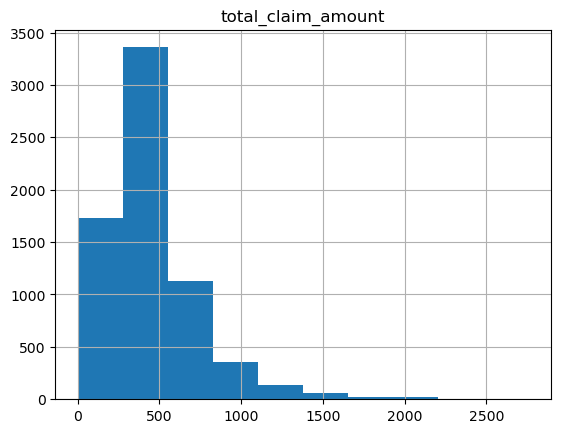

In [11]:
y_train.hist()

###  ALTERNATIVE: SCALING WITH STANDARD SCALER 

In [12]:
# calling the scaler and saving with scaler 
scaler = StandardScaler()

# create the frame/fit
scaler = scaler.fit(X_train)

# populate with data/transform and save in new variables 
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [13]:
X_train_fit

NameError: name 'X_train_fit' is not defined

### Model training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# i train the model with the transformed training sets from exploring var x and **non-transformed** labels y
lm = LinearRegression()
model = lm.fit(X_train_trans,y_train) # fitting the model to the data! using the liner functon formula. 

#creates the linear function line

# y_train can be scaled by not in this task. 

# calculating the line of best fit 
# the process my test data goes through must be the same train data. e.g. same scaler 

In [ ]:
model.coef_

In [ ]:
model.intercept_

### NOT SO OBVIOUS WHAT WENT WRONG

### Model Interpretation

In [ ]:
predictions = model.predict(X_test_trans)
predictions

In [ ]:
random_test = X_test_trans.sample()

In [ ]:
random_test

In [ ]:
model.predict(random_test)

### Create predictions for test set

In [ ]:
y_pred = model.predict(X_test_trans)

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
residuals_df = pd.concat([y_test,y_pred],axis=1)

In [ ]:
residuals_df = resiudals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})



In [ ]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [ ]:
round(residuals_df,2)

## (Wednesday)

Model Validation
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
residuals_df = pd.concat([y_test,y_pred],axis=1)

In [ ]:
residuals_df = resiudals_df.rename(columns={"body_mass_g":"y_test", 0:"y_pred"})

In [ ]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [ ]:
residuals_df.head()

In [ ]:
from sklearn. metrics import mean_squared_error as mse, mean_absolute_error as mae 
mse(y_test,y_pred)